In [989]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

In [990]:
def process_data(df):
    df.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
    df.rename(columns={'Customer/Vendor Name' : 'Customer','Non-Inventory Quantity': 'Qty', 'Transaction Date' : 'Date'}, inplace=True)
    df = df[df.Customer != "TRANSFERS TO #372 J'VILLE"]
    df = df[df.Customer != "TRANSFERS TO #374 SEYMOUR"]
    df = df[df.Customer != "TRANSFERS TO #373 E-TOWN"]
    df = df[df.Customer != "TRANSFERS TO #375 S'VILLE"]
    df = df[df.Customer != "*** STORE TRANSFERS ***"]
    df = df[df.Customer != "Beginning Balance"]
    df = df[df.Customer != 'Net Activity']
    df = df[df.Customer != 'Ending Balance']
    df = df[df.Customer != 'VOID']
    df = df[df.Customer != "TRANSFERS TO #376 L'VILLE"]
    df = df.dropna(how="all")
    Gross = df.Qty * df.Price
    df['Gross'] = Gross.where(df.Price == 'Qty', other=Gross)
    Net = df.Qty * df.Cost 
    df['Net'] = Net.where(df.Cost == 'Qty', other=Net)
    Net = df.Gross - df.Net 
    df['Net'] = Net.where(df.Gross == "Net", other=Net)
    return df


In [991]:
df0 = pd.read_excel (r'input/370.xlsx',header=[3])
df0 = process_data(df0)
df1 = pd.read_excel (r'input/372.xlsx',header=[3])
df1 = process_data(df1)
df2 = pd.read_excel (r'input/372.xlsx',header=[3])
df2 = process_data(df2)
df3 = pd.read_excel (r'input/372.xlsx',header=[3])
df3 = process_data(df3)
df4 = pd.read_excel (r'input/372.xlsx',header=[3])
df4 = process_data(df4)
df5 = pd.read_excel (r'input/372.xlsx',header=[3])
df5 = process_data(df5)

# df5

/Users/dannymorton/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/dannymorton/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/dannymorton/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/dannymorton/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/dannymorton/opt/anaconda3/lib

In [992]:
Net_Gross270 = {
    'Gross' : df0['Gross'].sum(),
    'Net' : df0['Net'].sum()
}

Net_Gross272 = {
    'Gross' : df1['Gross'].sum(),
    'Net' : df1['Net'].sum()
}
Net_Gross273 = {
    'Gross' : df2['Gross'].sum(),
    'Net' : df2['Net'].sum()
}

Net_Gross274 = {
    'Gross' : df3['Gross'].sum(),
    'Net' : df3['Net'].sum()
}

Net_Gross275 = {
    'Gross' : df4['Gross'].sum(),
    'Net' : df4['Net'].sum()
}

Net_Gross276 = {
    'Gross' : df5['Gross'].sum(),
    'Net' : df5['Net'].sum()
}


In [993]:
df3

,Date,Customer,Qty,Price,Cost,Gross,Net
1,2022-10-31,"GOTTA GO, INC. - TRACKING",1.0,75.0,50.0,75.0,25.0
8,2022-10-12,ERNST CONCRETE KENTUCKIAN,8.0,80.0,50.0,640.0,240.0
10,2022-10-06,"GOTTA GO, INC.",2.0,75.0,50.0,150.0,50.0
18,2022-09-22,"GOTTA GO, INC.",2.0,75.0,50.0,150.0,50.0
19,2022-09-20,"GOTTA GO, INC. - TRACKING",1.0,75.0,50.0,75.0,25.0
20,2022-09-20,MILLER TRANSPORTATION/ IN,9.0,75.0,50.0,675.0,225.0
23,2022-09-07,"GOTTA GO, INC. - TRACKING",1.0,75.0,50.0,75.0,25.0
24,2022-09-07,"GOTTA GO, INC.",2.0,75.0,50.0,150.0,50.0
25,2022-09-07,"GOTTA GO, INC.",2.0,75.0,50.0,150.0,50.0
31,2022-08-23,"GOTTA GO, INC.",1.0,75.0,50.0,75.0,25.0


In [994]:
def top_customers(df):
    by_cust =(df['Customer']).value_counts().sort_index()
    df_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
    df_customer.sort_values(by=['counts'], ascending=False, inplace=True)
    df_customer = df_customer.reset_index(drop=True)
    return df

In [995]:
tc3 = top_customers(df3)
tc3

,Date,Customer,Qty,Price,Cost,Gross,Net
1,2022-10-31,"GOTTA GO, INC. - TRACKING",1.0,75.0,50.0,75.0,25.0
8,2022-10-12,ERNST CONCRETE KENTUCKIAN,8.0,80.0,50.0,640.0,240.0
10,2022-10-06,"GOTTA GO, INC.",2.0,75.0,50.0,150.0,50.0
18,2022-09-22,"GOTTA GO, INC.",2.0,75.0,50.0,150.0,50.0
19,2022-09-20,"GOTTA GO, INC. - TRACKING",1.0,75.0,50.0,75.0,25.0
20,2022-09-20,MILLER TRANSPORTATION/ IN,9.0,75.0,50.0,675.0,225.0
23,2022-09-07,"GOTTA GO, INC. - TRACKING",1.0,75.0,50.0,75.0,25.0
24,2022-09-07,"GOTTA GO, INC.",2.0,75.0,50.0,150.0,50.0
25,2022-09-07,"GOTTA GO, INC.",2.0,75.0,50.0,150.0,50.0
31,2022-08-23,"GOTTA GO, INC.",1.0,75.0,50.0,75.0,25.0


In [996]:
by_cust =(df3['Customer']).value_counts().sort_index()
df3_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df3_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df3_customer = df3_customer.reset_index(drop=True)
df3_customer

,Customer,counts
0,"GOTTA GO, INC.",14
1,A & R LOGISTICS INC,13
2,DUBOIS COUNTY TIRE & SUPP,6
3,"GOTTA GO, INC. - TRACKING",5
4,MISTER P EXPRESS INC.,3
5,ERNST CONCRETE KENTUCKIAN,2
6,MILLER TRANSPORTATION/ IN,2
7,RAY-LEE TRANSPORT,2
8,A&S TRUCK RD SERVICE LLC,1
9,C-JAMS,1


In [997]:
def graph(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = df['Date'].dt.strftime('%Y-%m')
    # #define how to aggregate various fields
    agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}
    # #create new DataFrame by combining rows with same id values
    df = df.groupby(df['Date']).aggregate(agg_functions)
    return df

In [998]:
g5 = df5
g5 = graph(df5)
g5

,Date,Gross,Net
Date,,,
2021-08,2021-08,315.0,65.0
2021-09,2021-09,540.0,90.0
2021-10,2021-10,675.0,225.0
2021-11,2021-11,375.0,125.0
2021-12,2021-12,690.0,240.0
2022-01,2022-01,1326.0,476.0
2022-02,2022-02,1560.0,560.0
2022-03,2022-03,375.0,125.0
2022-04,2022-04,2478.0,878.0


In [999]:
by_cust =(df0['Customer']).value_counts().sort_index()
df0_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df0_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df0_customer = df0_customer.reset_index(drop=True)
# df0_customer
df0_customer.to_csv(r'output/370_customers.csv', index=False)

In [1000]:
df0['Date'] = pd.to_datetime(df0['Date'])
df0['Date'] = df0['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df0 = df0.groupby(df0['Date']).aggregate(agg_functions)

# print(df0)

# df_new.to_csv(r'df5.csv', index=False)

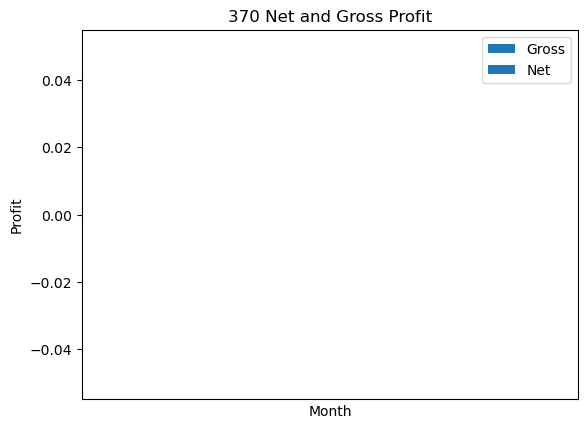

In [1001]:
# x-coordinates of left sides of bars 
left = df0['Date']
  
# heights of bars
Gross = df0['Gross']
Net = df0['Net']
  
# labels for bars
tick_label = df0['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('370 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/370_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

Store 372 Import and Clean 

In [1002]:
by_cust =(df1['Customer']).value_counts().sort_index()
df1_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df1_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df1_customer = df1_customer.reset_index(drop=True)
df1_customer
# df1_customer.to_csv(r'output/372_customers.csv', index=False)

,Customer,counts
0,"GOTTA GO, INC.",14
1,A & R LOGISTICS INC,13
2,DUBOIS COUNTY TIRE & SUPP,6
3,"GOTTA GO, INC. - TRACKING",5
4,MISTER P EXPRESS INC.,3
5,ERNST CONCRETE KENTUCKIAN,2
6,MILLER TRANSPORTATION/ IN,2
7,RAY-LEE TRANSPORT,2
8,A&S TRUCK RD SERVICE LLC,1
9,C-JAMS,1


In [1003]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df1 = df1.groupby(df1['Date']).aggregate(agg_functions)

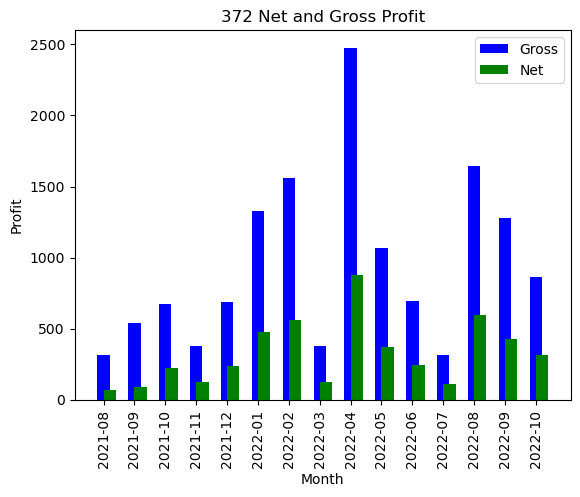

In [1007]:
# x-coordinates of left sides of bars 
left = df1['Date']
  
# heights of bars
Gross = df1['Gross']
Net = df1['Net']
  
# labels for bars
tick_label = df1['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.4, color = ['blue'],align='center', label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.4, color = ['green'], align='edge', label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('372 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/372_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

Store 373 Import and Clean 

In [ ]:
by_cust =(df2['Customer']).value_counts().sort_index()
df2_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df2_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df2_customer = df2_customer.reset_index(drop=True)
df2_customer
# df2_customer.to_csv(r'output/373_customers.csv', index=False)

,Customer,counts
0,"GOTTA GO, INC.",14
1,A & R LOGISTICS INC,13
2,DUBOIS COUNTY TIRE & SUPP,6
3,"GOTTA GO, INC. - TRACKING",5
4,MISTER P EXPRESS INC.,3
5,ERNST CONCRETE KENTUCKIAN,2
6,MILLER TRANSPORTATION/ IN,2
7,RAY-LEE TRANSPORT,2
8,A&S TRUCK RD SERVICE LLC,1
9,C-JAMS,1


In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Date'] = df2['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df2 = df2.groupby(df2['Date']).aggregate(agg_functions)

print(df2)


            Date   Gross    Net
Date                           
2021-08  2021-08   315.0   65.0
2021-09  2021-09   540.0   90.0
2021-10  2021-10   675.0  225.0
2021-11  2021-11   375.0  125.0
2021-12  2021-12   690.0  240.0
2022-01  2022-01  1326.0  476.0
2022-02  2022-02  1560.0  560.0
2022-03  2022-03   375.0  125.0
2022-04  2022-04  2478.0  878.0
2022-05  2022-05  1068.0  368.0
2022-06  2022-06   696.0  246.0
2022-07  2022-07   312.0  112.0
2022-08  2022-08  1645.0  595.0
2022-09  2022-09  1275.0  425.0
2022-10  2022-10   865.0  315.0


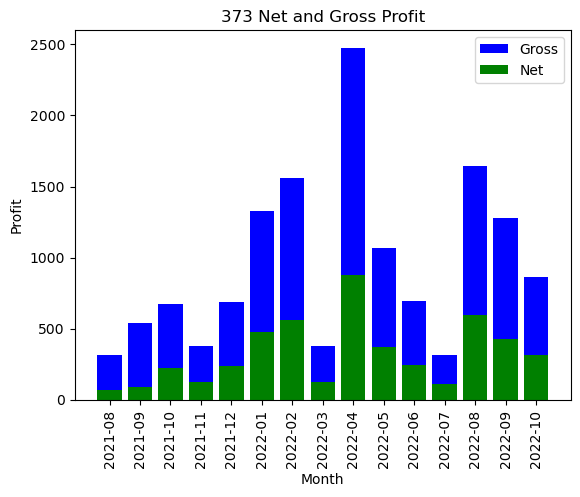

In [ ]:
# x-coordinates of left sides of bars 
left = df2['Date']
  
# heights of bars
Gross = df2['Gross']
Net = df2['Net']
  
# labels for bars
tick_label = df2['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('373 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/373_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

Store 374 Import and Clean 

In [ ]:
by_cust =(df3['Customer']).value_counts().sort_index()
df3_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df3_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df3_customer = df3_customer.reset_index(drop=True)
# df3_customer
df3_customer.to_csv(r'output/374_customers.csv', index=False)

In [ ]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Date'] = df3['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df3 = df3.groupby(df3['Date']).aggregate(agg_functions)

# print(df3)

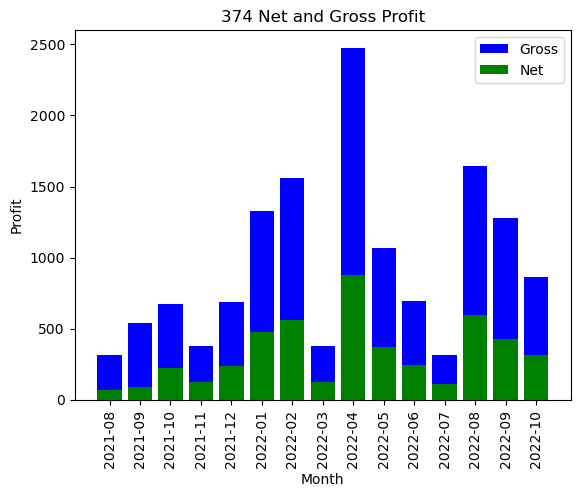

In [ ]:
# x-coordinates of left sides of bars 
left = df3['Date']
  
# heights of bars
Gross = df3['Gross']
Net = df3['Net']
  
# labels for bars
tick_label = df3['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('374 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/374_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

Store 375 Import and Clean 

In [ ]:
by_cust =(df4['Customer']).value_counts().sort_index()
df4_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df4_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df4_customer = df4_customer.reset_index(drop=True)
df4_customer
df4_customer.to_csv(r'output/375_customers.csv', index=False)

In [ ]:
df4['Date'] = pd.to_datetime(df4['Date'])
df4['Date'] = df4['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df4 = df4.groupby(df4['Date']).aggregate(agg_functions)

# print(df4)

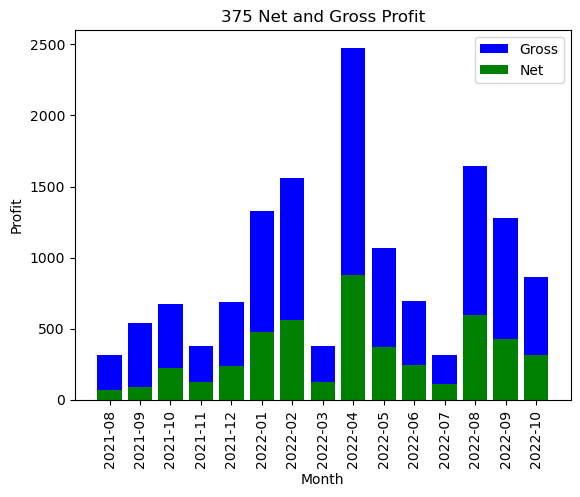

In [ ]:
# x-coordinates of left sides of bars 
left = df4['Date']
  
# heights of bars
Gross = df4['Gross']
Net = df4['Net']
  
# labels for bars
tick_label = df4['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('375 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/375_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

In [ ]:
by_cust =(df5['Customer']).value_counts().sort_index()
df5_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df5_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df5_customer = df5_customer.reset_index(drop=True)
df5_customer
df5_customer.to_csv(r'output/376_customers.csv', index=False)

In [ ]:
df5['Date'] = pd.to_datetime(df5['Date'])
df5['Date'] = df5['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df5 = df5.groupby(df5['Date']).aggregate(agg_functions)

# print(df5)

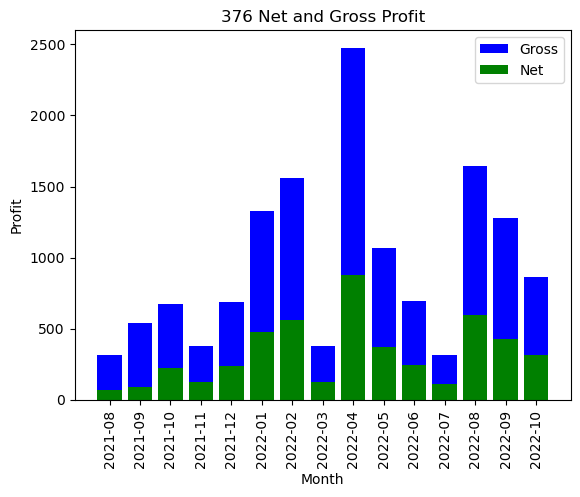

In [ ]:
# x-coordinates of left sides of bars 
left = df5['Date']
  
# heights of bars
Gross = df5['Gross']
Net = df5['Net']
  
# labels for bars
tick_label = df5['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('376 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/376_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

In [ ]:
frames = [df0, df1, df2, df3, df4, df5]

df99 = pd.concat(frames)
# df99.drop(columns=['Date'], inplace=True)
# df99.head(30)

# print(df99['Net'].sum())
# print(df99['Gross'].sum())

In [ ]:
frames = [df0, df1, df2, df3, df4, df5]

df99 = pd.concat(frames)
df99.head()

# print(df99['Net'].sum())
# print(df99['Gross'].sum())


Net_Gross = {
    '370_Gross' : df0['Gross'].sum(),
    '370_net' : df0['Net'].sum(),
    '372_Gross' : df1['Gross'].sum(),
    '372_net' : df1['Net'].sum(),
    '373_Gross' : df2['Gross'].sum(),
    '373_net' : df2['Net'].sum(),
    '374_Gross' : df3['Gross'].sum(),
    '374_net' : df3['Net'].sum(),
    '375_Gross' : df4['Gross'].sum(),
    '375_net' : df4['Net'].sum(),
    '376_Gross' : df5['Gross'].sum(),
    '376_net' : df5['Net'].sum(),
}

data = Net_Gross
names = list(data.keys())
values = list(data.values())


# print('Total Gross:',(Total_Gross))
# print('Total Net:',(Total_net))


In [ ]:
df99['Date'] = pd.to_datetime(df99['Date'])
df99['Date'] = df99['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df99 = df99.groupby(df99['Date']).aggregate(agg_functions)

# print(df99)

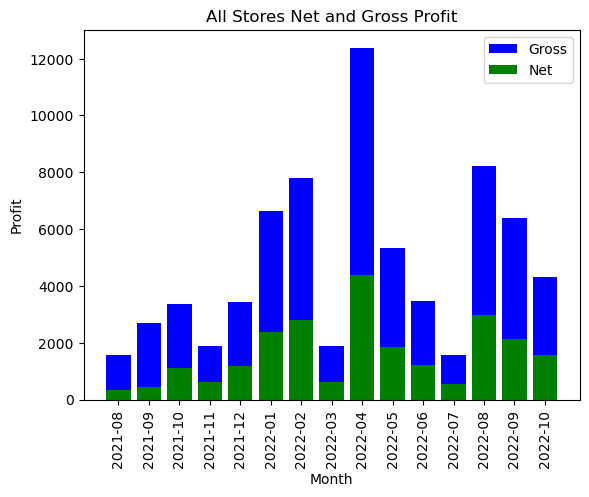

In [ ]:
# x-coordinates of left sides of bars 
left = df99['Date']
  
# heights of bars
Gross = df99['Gross']
Net = df99['Net']
  
# labels for bars
tick_label = df99['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('All Stores Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/all_stores_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()
